<a href="https://colab.research.google.com/github/mnauvalr/TomaTreat-coba/blob/main/Copy_of_InceptionV3_ke2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) && cp kaggle.json ~/.kaggle/ && echo 'Done'
!kaggle datasets download -d jarvis705/tomato-leaf-disease

Done
 98% 316M/322M [00:03<00:00, 51.2MB/s]
100% 322M/322M [00:03<00:00, 86.4MB/s]


In [ ]:
from zipfile import ZipFile

filename = "tomato-leaf-disease.zip"

with ZipFile(filename, 'r') as zip:
  zip.extractall()
  print('Done!')

Done!


In [ ]:
!rm -rf TomatoLeafDiseases

In [ ]:
import os

classes=['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight', 
         'Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot','Tomato___Spider_mites Two-spotted_spider_mite',
         'Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus','Tomato___healthy']
root = '/content/Tomato Leaf Diseases/'

os.makedirs(root+'Testing Set')
try:
    for i in classes:
        os.makedirs(root+'Testing Set/'+i+'/')
except OSError:
    print('error')
    pass

In [ ]:
import numpy as np
import random
import shutil
from shutil import copyfile

def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    allFileNames = os.listdir(SOURCE)
    np.random.shuffle(allFileNames)
    training_fileNames, testing_fileNames = np.split(np.array(allFileNames), [int(len(allFileNames)*SPLIT_SIZE)])
    
    training_fileNames = [SOURCE+name for name in training_fileNames.tolist()]
    testing_fileNames = [SOURCE+name for name in testing_fileNames.tolist()]
    
    for name in training_fileNames:
      a = os.path.basename(name)
      if not os.path.exists(os.path.join(TRAINING, a)):
        shutil.copy(name, TRAINING)
      else:
        base, extension = os.path.splitext(a)
        i = 1
        while os.path.exists(os.path.join(TRAINING, '{}_{}{}'.format(base, i, extension))):
            i += 1
        shutil.copy(name, os.path.join(TRAINING, '{}_{}{}'.format(base, i, extension)))

    for name in testing_fileNames:
      a = os.path.basename(name)
      if not os.path.exists(os.path.join(TESTING, a)):
        shutil.copy(name, TESTING)
      else:
        base, extension = os.path.splitext(a)
        i = 1
        while os.path.exists(os.path.join(TESTING, '{}_{}{}'.format(base, i, extension))):
            i += 1
        shutil.copy(name, os.path.join(TESTING, '{}_{}{}'.format(base, i, extension)))

train_dir = '/content/Tomato Leaf Diseases/Training Set'
validation_dir = '/content/Tomato Leaf Diseases/Validation Set'
testing_dir = '/content/Tomato Leaf Diseases/Testing Set'

validation_tomato_bacterial_dir = os.path.join(validation_dir, 'Tomato___Bacterial_spot/')
train_tomato_bacterial_dir = os.path.join(train_dir,'Tomato___Bacterial_spot/')
testing_tomato_bacterial_dir = os.path.join(testing_dir,'Tomato___Bacterial_spot/')

validation_tomato_early_blight_dir = os.path.join(validation_dir, 'Tomato___Early_blight/')
train_tomato_early_blight_dir = os.path.join(train_dir,'Tomato___Early_blight/')
testing_tomato_early_blight_dir = os.path.join(testing_dir,'Tomato___Early_blight/')

validation_tomato_late_blight_dir = os.path.join(validation_dir, 'Tomato___Late_blight/')
train_tomato_late_blight_dir = os.path.join(train_dir,'Tomato___Late_blight/')
testing_tomato_late_blight_dir = os.path.join(testing_dir,'Tomato___Late_blight/')

validation_tomato_leaf_mold_dir = os.path.join(validation_dir, 'Tomato___Leaf_Mold/')
train_tomato_leaf_mold_dir = os.path.join(train_dir,'Tomato___Leaf_Mold/')
testing_tomato_leaf_mold_dir = os.path.join(testing_dir,'Tomato___Leaf_Mold/')

validation_tomato_septoria_leaf_spot_dir = os.path.join(validation_dir, 'Tomato___Septoria_leaf_spot/')
train_tomato_septoria_leaf_spot_dir = os.path.join(train_dir,'Tomato___Septoria_leaf_spot/')
testing_tomato_septoria_leaf_spot_dir = os.path.join(testing_dir,'Tomato___Septoria_leaf_spot/')

validation_tomato_spider_mites_dir = os.path.join(validation_dir, 'Tomato___Spider_mites Two-spotted_spider_mite/')
train_tomato_spider_mites_dir = os.path.join(train_dir,'Tomato___Spider_mites Two-spotted_spider_mite/')
testing_tomato_spider_mites_dir = os.path.join(testing_dir,'Tomato___Spider_mites Two-spotted_spider_mite/')

validation_tomato_target_spot_dir = os.path.join(validation_dir, 'Tomato___Target_Spot/')
train_tomato_target_spot_dir = os.path.join(train_dir,'Tomato___Target_Spot/')
testing_tomato_target_spot_dir = os.path.join(testing_dir,'Tomato___Target_Spot/')

validation_tomato_yellow_leaf_dir = os.path.join(validation_dir, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus/')
train_tomato_yellow_leaf_dir = os.path.join(train_dir,'Tomato___Tomato_Yellow_Leaf_Curl_Virus/')
testing_tomato_yellow_leaf_dir = os.path.join(testing_dir,'Tomato___Tomato_Yellow_Leaf_Curl_Virus/')

validation_tomato_mosaic_virus_dir = os.path.join(validation_dir, 'Tomato___Tomato_mosaic_virus/')
train_tomato_mosaic_virus_dir = os.path.join(train_dir,'Tomato___Tomato_mosaic_virus/')
testing_tomato_mosaic_virus_dir = os.path.join(testing_dir,'Tomato___Tomato_mosaic_virus/')

validation_tomato_healthy_dir = os.path.join(validation_dir, 'Tomato___healthy/')
train_tomato_healthy_dir = os.path.join(train_dir,'Tomato___healthy/')
testing_tomato_healthy_dir = os.path.join(testing_dir,'Tomato___healthy/')

split_size = .572
split_data(validation_tomato_bacterial_dir, train_tomato_bacterial_dir, testing_tomato_bacterial_dir, split_size)
split_data(validation_tomato_early_blight_dir, train_tomato_early_blight_dir, testing_tomato_early_blight_dir, split_size)
split_data(validation_tomato_late_blight_dir, train_tomato_late_blight_dir, testing_tomato_late_blight_dir, split_size)
split_data(validation_tomato_leaf_mold_dir, train_tomato_leaf_mold_dir, testing_tomato_leaf_mold_dir, split_size)
split_data(validation_tomato_septoria_leaf_spot_dir, train_tomato_septoria_leaf_spot_dir, testing_tomato_septoria_leaf_spot_dir, split_size)
split_data(validation_tomato_spider_mites_dir, train_tomato_spider_mites_dir, testing_tomato_spider_mites_dir, split_size)
split_data(validation_tomato_target_spot_dir, train_tomato_target_spot_dir, testing_tomato_target_spot_dir, split_size)
split_data(validation_tomato_yellow_leaf_dir, train_tomato_yellow_leaf_dir, testing_tomato_yellow_leaf_dir, split_size)
split_data(validation_tomato_mosaic_virus_dir, train_tomato_mosaic_virus_dir , testing_tomato_mosaic_virus_dir , split_size)
split_data(validation_tomato_healthy_dir, train_tomato_healthy_dir , testing_tomato_healthy_dir , split_size)

In [ ]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/Tomato Leaf Diseases/Training Set'
testing_dir = '/content/Tomato Leaf Diseases/Testing Set'

datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255, validation_split = 0.3)


train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   validation_split = 0.3,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# TRAIN GENERATOR.
train_generator = datagen.flow_from_directory(train_dir,
                                              subset="training",
                                              shuffle=True,
                                              seed=42,
                                              target_size=(256,256),
                                              class_mode='categorical')

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# VALIDATION GENERATOR.
validation_generator = datagen.flow_from_directory(train_dir,
                                                   subset="validation",
                                                   shuffle=False,
                                                   seed=42,
                                                   target_size=(256,256),
                                                   class_mode='categorical')

testing_datagen = ImageDataGenerator(rescale=1.0/255)

# TESTING GENERATOR.
testing_generator = testing_datagen.flow_from_directory(testing_dir,
                                                        shuffle=False,
                                                        seed=42,
                                                        target_size=(256,256),
                                                        class_mode='categorical')

Found 9800 images belonging to 10 classes.
Found 4200 images belonging to 10 classes.
Found 3000 images belonging to 10 classes.


# Trainable = False

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras.applications import inception_v3
from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet',
                         include_top=False,
                         input_shape=(256, 256, 3))

base_model.trainable = False

add_model = Sequential()
add_model.add(base_model)
add_model.add(Flatten())
add_model.add(Dense(256, activation='relu'))
add_model.add(Dropout(0.5))
add_model.add(Dense(train_generator.num_classes, activation='softmax'))

model = add_model

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten (Flatten)            (None, 73728)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               18874624  
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 40,679,978
Trainable params: 18,877,194
Non-trainable params: 21,802,784
_________________________________________________________________


In [ ]:
from tensorflow import keras

model.compile(optimizer=keras.optimizers.SGD(learning_rate=1e-4,
                                                 momentum=0.9),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [ ]:
file_path="weights.best.hdf5"

checkpoint = ModelCheckpoint(file_path, monitor='val_loss', verbose=1, save_best_only=True, mode='min')
#early = EarlyStopping(monitor="val_loss", mode="min", patience=5)

callbacks_list = [checkpoint]
#callbacks_list = [checkpoint, early] #early

history = model.fit(
          train_generator,
          steps_per_epoch=train_generator.samples//train_generator.batch_size,
          epochs=30,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples//validation_generator.batch_size,
          callbacks=callbacks_list)

Epoch 1/30
306/306 [==============================] - 62s 156ms/step - loss: 1.8007 - accuracy: 0.3916 - val_loss: 0.8311 - val_accuracy: 0.7228

Epoch 00001: val_loss improved from inf to 0.83115, saving model to weights.best.hdf5
Epoch 2/30
306/306 [==============================] - 42s 137ms/step - loss: 0.8759 - accuracy: 0.7062 - val_loss: 0.6448 - val_accuracy: 0.7803

Epoch 00002: val_loss improved from 0.83115 to 0.64479, saving model to weights.best.hdf5
Epoch 3/30
306/306 [==============================] - 42s 136ms/step - loss: 0.6629 - accuracy: 0.7782 - val_loss: 0.5603 - val_accuracy: 0.8115

Epoch 00003: val_loss improved from 0.64479 to 0.56026, saving model to weights.best.hdf5
Epoch 4/30
306/306 [==============================] - 42s 137ms/step - loss: 0.5357 - accuracy: 0.8227 - val_loss: 0.5326 - val_accuracy: 0.8237

Epoch 00004: val_loss improved from 0.56026 to 0.53257, saving model to weights.best.hdf5
Epoch 5/30
306/306 [==============================] - 42s 13

# Graphic Accuracy and Loss

In [ ]:
import matplotlib.pyplot as plt

def plot_train_history(history1):
    # Summarize history for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    # Summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

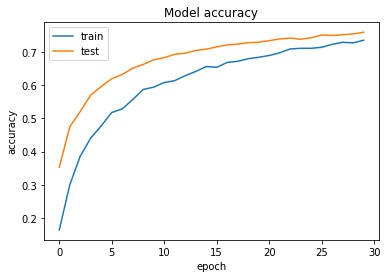

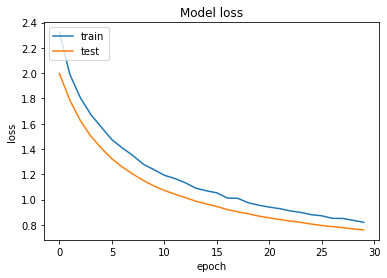

In [ ]:
plot_train_history(history)

# Confusion Matrix

In [ ]:
from keras.models import load_model

filepath = "/content/weights.best.hdf5"

# Load the model
model = load_model(filepath, compile = True)

preds = model.predict_generator(testing_generator, steps=5)
label = testing_generator.classes
pred = model.predict(testing_generator)
predicted_class_indices=np.argmax(pred,axis=1)

labels = (testing_generator.class_indices)
labels2 = dict((v,k) for k,v in labels.items())
predictions = [labels2[k] for k in predicted_class_indices]

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

cf_report = classification_report(predicted_class_indices,label)
cm = confusion_matrix(predicted_class_indices,label)

print(cf_report)

              precision    recall  f1-score   support

           0       0.84      0.74      0.79       340
           1       0.69      0.67      0.68       310
           2       0.76      0.80      0.78       285
           3       0.51      0.69      0.59       222
           4       0.65      0.75      0.70       262
           5       0.80      0.78      0.79       306
           6       0.65      0.66      0.66       298
           7       0.90      0.94      0.92       287
           8       0.92      0.67      0.78       413
           9       0.83      0.90      0.86       277

    accuracy                           0.76      3000
   macro avg       0.76      0.76      0.75      3000
weighted avg       0.77      0.76      0.76      3000



# Predict

Saving early-blight-leaf-tomato.jpg to early-blight-leaf-tomato (1).jpg


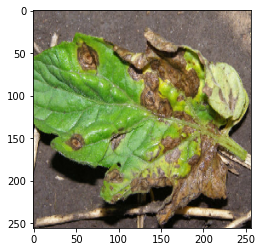

[3.6675523e-08 8.8032860e-01 1.1831511e-01 1.2540309e-03 5.8420137e-05
 6.2930798e-09 4.3900363e-05 2.2741185e-08 8.9457663e-10 1.5059157e-08]
Tomato___Bacterial_spot: 0.00%
Tomato___Early_blight: 88.03%
Tomato___Late_blight: 11.83%
Tomato___Leaf_Mold: 0.13%
Tomato___Septoria_leaf_spot: 0.01%
Tomato___Spider_mites Two-spotted_spider_mite: 0.00%
Tomato___Target_Spot: 0.00%
Tomato___Tomato_Yellow_Leaf_Curl_Virus: 0.00%
Tomato___Tomato_mosaic_virus: 0.00%
Tomato___healthy: 0.00%


In [ ]:
import numpy as np
from keras.preprocessing import image
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = list(train_generator.class_indices.keys())

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(256, 256))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model.predict(images)[0]
  plt.imshow(img)
  plt.show()
  print(proba)
  for i in range(len(labels)):
    print("{}: {:.2f}%".format(labels[i], proba[i]* 100))

# Fine Tune

In [ ]:
from keras.models import Sequential
from keras.models import Model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau, TensorBoard
from keras import optimizers, losses, activations, models
from keras.layers import Convolution2D, Dense, Input, Flatten, Dropout, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, Concatenate
from keras import applications

base_model = applications.InceptionV3(weights='imagenet', 
                                include_top=False, 
                                input_shape=(256, 256, 3))

for layer in base_model.layers[-20:]:
  print(layer)
  base_model.trainable = True

add_model = Sequential()
add_model.add(base_model)
add_model.add(Flatten())
add_model.add(Dense(512, activation='relu'))
add_model.add(Dropout(0.3))
add_model.add(Dense(train_generator.num_classes, activation='softmax'))

model = add_model

model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Functional)    (None, 6, 6, 2048)        21802784  
_________________________________________________________________
flatten_13 (Flatten)         (None, 73728)             0         
_________________________________________________________________
dense_26 (Dense)             (None, 512)               37749248  
_________________________________________________________________
dropout_13 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_27 (Dense)             (None, 10)                5130      
Total params: 59,557,162
Trainable params: 59,522,730
Non-trainable params: 34,432
_________________________________________________________________
